In [15]:
import sys
sys.path.append('../')
from benji_girgs import utils, generation, plotting
import os
import glob
import pandas as pd
import networkit

import networkit as nk
import matplotlib.pyplot as plt


data_dir = '/Users/benjidayan/Documents/GIRG_data/'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np


In [2]:
import sys
sys.path.append('../../nemo-eva/src/')

import feature_extractor

In [3]:
data_dir = '/cluster/scratch/bdayan/GIRG_data/'

results_csv = '../../nemo-eva/data-paper/3-cleaned_features/results.csv'
df = pd.read_csv(results_csv)

df = df.loc[df.Model == 'real-world']

socfb_graphs = df.loc[df.Model == 'real-world'].loc[df.Type == 'socfb'].sort_values('Nodes')


graph_name_group_pairs = socfb_graphs[['Graph', 'Type']].to_numpy()
graph_dicts = []
for graph_name, group in graph_name_group_pairs:
    fn = glob.glob(data_dir + graph_name + '.*')[0]
    print(fn)
    # TODO remove? socfg-nips-ego has avg deg 2.0 which is very small, and for some reason
    # makes GIRG finding much slower
    if graph_name == 'socfb-nips-ego':
        continue
    graph_dict = {"Group": group, "FullPath": fn, "Name": graph_name}
    graph_dicts.append(graph_dict)

/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-nips-ego.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.Sp

In [4]:
socfb_graphs

,Graph,Centrality.Betweenness.Dispersion.Coefficient Of Variation,Centrality.Betweenness.Dispersion.Standard Deviation,Centrality.Betweenness.Dispersion.Standard Deviation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation,Centrality.Betweenness.Dispersion.Uncorrected Standard Deviation,Centrality.Betweenness.Dispersion.Uncorrected Standard Deviation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Variance,Centrality.Betweenness.Dispersion.Uncorrected Variance (Rank),Centrality.Betweenness.Dispersion.Variance,...,Partition.CoreDecomposition.Location.Cubic Mean,Partition.CoreDecomposition.Location.Harmonic Mean,Partition.CoreDecomposition.Location.Interquartile Mean,Partition.CoreDecomposition.Location.Max,Partition.CoreDecomposition.Location.Median,Partition.CoreDecomposition.Location.Mid-Range,Partition.CoreDecomposition.Location.Min,Partition.CoreDecomposition.Location.Quadratic Mean,Partition.CoreDecomposition.Properties.Size,Type
707,socfb-Caltech36,2.929816,0.006266,219.901395,2.927893,0.006262,219.757055,3.921510e-05,4.829316e+04,3.926664e-05,...,83.157169,10.757883,13.052632,271.0,13.0,137.0,3.0,48.645658,35,socfb
605,socfb-Reed98,2.782411,0.004800,277.711697,2.780964,0.004797,277.567319,2.301521e-05,7.704362e+04,2.303915e-05,...,62.435780,19.842982,20.833333,196.0,21.5,103.5,11.0,42.077659,34,socfb
1013,socfb-Haverford76,2.756790,0.002672,417.540578,2.755837,0.002671,417.396176,7.132507e-06,1.742196e+05,7.137443e-06,...,84.123002,12.546150,13.757576,328.0,13.0,165.5,3.0,47.942095,63,socfb
1187,socfb-Simmons81,2.560258,0.002564,435.743413,2.559410,0.002563,435.599103,6.567447e-06,1.897466e+05,6.571799e-06,...,134.199473,27.193775,27.333333,429.0,28.0,222.0,15.0,82.840740,34,socfb
425,socfb-Swarthmore42,2.378772,0.001952,478.451071,2.378054,0.001952,478.306676,3.809092e-06,2.287773e+05,3.811392e-06,...,127.357825,14.573820,16.566667,497.0,16.0,251.0,5.0,68.194697,60,socfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,socfb-UF,18.489400,0.001093,10131.410253,18.489137,0.001093,10131.265975,1.195204e-06,1.026426e+08,1.195238e-06,...,604.963416,335.449874,413.604651,2252.0,417.0,1171.5,91.0,486.502083,83,socfb
413,socfb-Texas84,12.437153,0.000733,10493.966289,12.436982,0.000733,10493.821998,5.379701e-07,1.101203e+08,5.379849e-07,...,556.521620,400.823020,421.853659,1825.0,419.0,963.0,101.0,487.741532,81,socfb
389,socfb-Penn94,13.004502,0.000697,11983.666177,13.004346,0.000697,11983.521920,4.863022e-07,1.436048e+08,4.863139e-07,...,776.584785,545.329303,606.093750,1676.0,611.5,875.5,75.0,718.618702,62,socfb
341,socfb-wosn-friends,9.305969,0.000541,18161.295061,9.305896,0.000541,18161.151814,2.926536e-07,3.298274e+08,2.926582e-07,...,2699.145785,507.549456,752.269231,8468.0,703.0,4279.0,90.0,1923.937529,52,socfb


In [5]:
fe = feature_extractor.FeatureExtractor(graph_dicts)

no results_df


In [25]:
import tqdm

in_path = graph_dicts[5]['FullPath']
in_path

g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)

gnew = nk.graph.Graph(g.numberOfNodes(), weighted=True)
for u, v in tqdm.tqdm(g.iterEdges()):
    _ = gnew.addEdge(u, v, 1.0)
    
g = gnew
g.isWeighted()

'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

90954it [00:00, 1212195.16it/s]


True

In [9]:
w, Phi, Psi, diff_map = utils.get_diffmap(g)

In [10]:
w.shape
w[:10]

(2235,)

array([1.        , 0.94019552, 0.86564817, 0.85946138, 0.84647265,
       0.81289371, 0.79435389, 0.78807551, 0.76065619, 0.75787648])

In [26]:
info_map, g_out = fe.fit_ndgirg_general(3, utils.LCC, cube=False, verbose=True)(g)
info = {x:eval(y) for x,y in [bar.split('=') for bar in info_map.split('|')]}

calling goal_f(alpha=100.0)
calling goal_f(alpha=2.0)
calling goal_f(alpha=1.0101010101010102)

a: 0.01, m: 0.5, b: 0.99, f_a: 0.44206160824783475, f_m: 0.3319244317480935, f_b: 0.13253319216954154, goal: 0.31038565883277547
calling goal_f(alpha=1.342281879194631)

a: 0.5, m: 0.745, b: 0.99, f_a: 0.3319244317480935, f_m: 0.2168270593301798, f_b: 0.13253319216954154, goal: 0.31038565883277547
calling goal_f(alpha=1.6064257028112447)

a: 0.5, m: 0.6225, b: 0.745, f_a: 0.3319244317480935, f_m: 0.27221745179198265, f_b: 0.2168270593301798, goal: 0.31038565883277547
calling goal_f(alpha=1.7817371937639197)

a: 0.5, m: 0.56125, b: 0.6225, f_a: 0.3319244317480935, f_m: 0.3000954169235317, f_b: 0.27221745179198265, goal: 0.31038565883277547
calling goal_f(alpha=1.884570082449941)

a: 0.5, m: 0.530625, b: 0.56125, f_a: 0.3319244317480935, f_m: 0.317724909309751, f_b: 0.3000954169235317, goal: 0.31038565883277547
calling goal_f(alpha=1.8317115054378936)

a: 0.530625, m: 0.5459375, b: 0.56125, f_

In [27]:
info

{'tau': 5.642546890477902,
 'alpha': 1.8446462026228563,
 'const': 3.713980652197997,
 'target_lcc': 0.31038565883277547,
 'fit_lcc': 0.31144570318458115,
 'fitting_time': 9.254690170288086,
 'hist': [(2.0, 0.3319244317480935),
  (1.342281879194631, 0.2168270593301798),
  (1.6064257028112447, 0.27221745179198265),
  (1.7817371937639197, 0.3000954169235317),
  (1.884570082449941, 0.317724909309751),
  (1.8317115054378936, 0.3088443769887928),
  (1.857764876632801, 0.3140693646529278),
  (1.8446462026228563, 0.3106008965159589)]}

In [13]:
w, Phi, Psi, diff_map = utils.get_diffmap(g)

<Figure size 500x500 with 0 Axes>

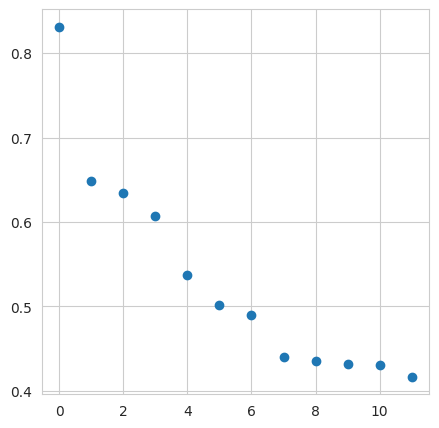

In [16]:
plt.figure(figsize=(5,5))
y = w[1:13]**3
plt.scatter(list(range(len(y))), y)

<Figure size 500x500 with 0 Axes>

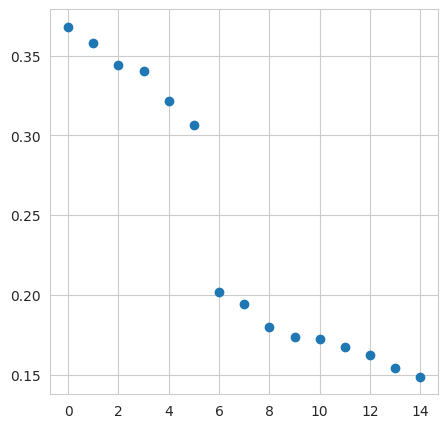

In [29]:
w, Phi, Psi, diff_map = utils.get_diffmap(g_out)
plt.figure(figsize=(5,5))
y = w[1:16]**8
plt.scatter(list(range(len(y))), y)

'/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne'

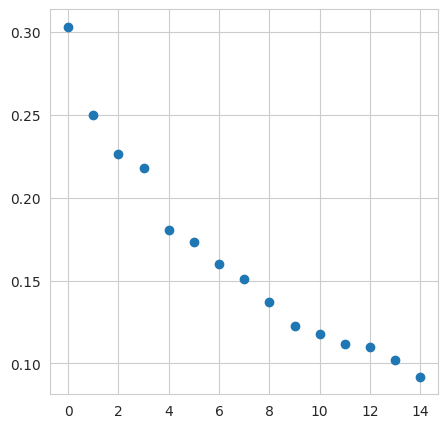

'/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne'

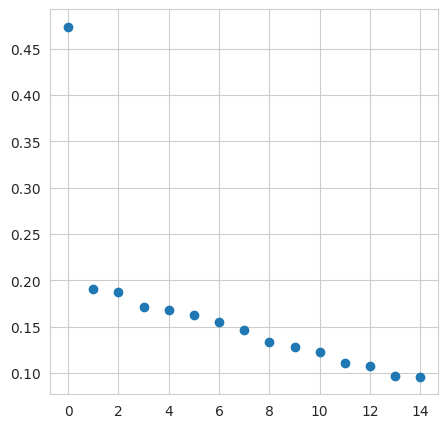

'/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne'

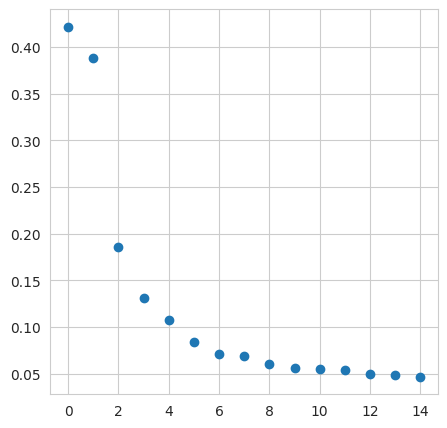

'/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne'

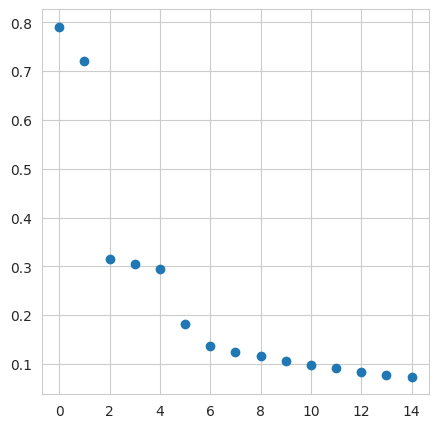

'/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne'

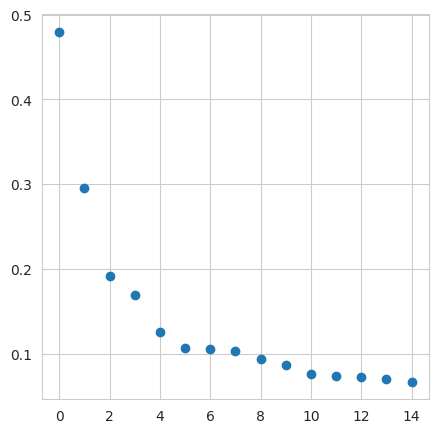

'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

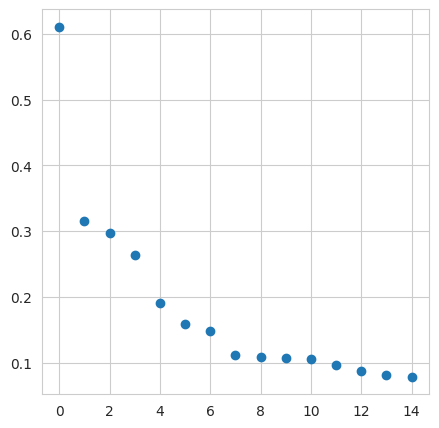

'/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne'

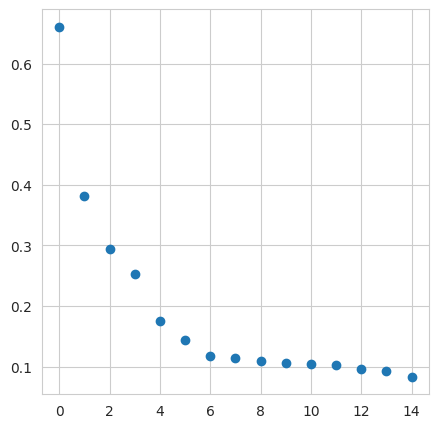

'/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne'

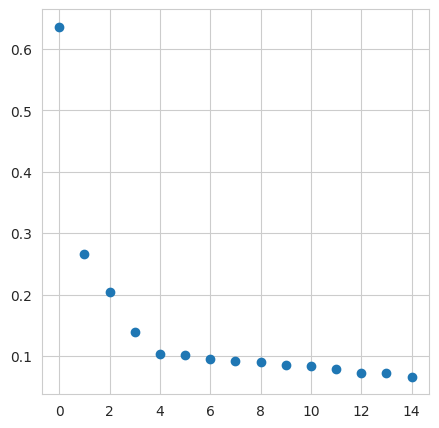

'/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne'

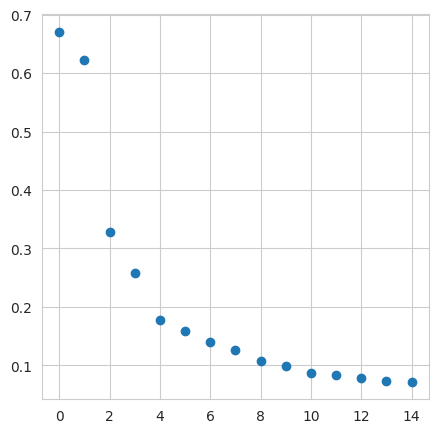

'/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne'

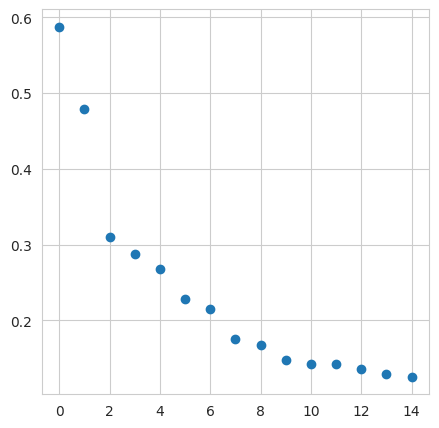

In [30]:
for i in range(10):

    in_path = graph_dicts[i]['FullPath']
    in_path

    g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)
    
    w, Phi, Psi, diff_map = utils.get_diffmap(g)
    _ = plt.figure(figsize=(5,5))
    y = w[1:16]**8
    _ = plt.scatter(list(range(len(y))), y)
    plt.show()



In [15]:
p = nk.community.detectCommunities(g)

Communities detected in 0.01320 [s]
solution properties:
-------------------  ------------
# communities            7
min community size       7
max community size     444
avg. community size    319.286
imbalance                1.3875
edge cut             35487
edge cut (portion)       0.390164
modularity               0.427749
-------------------  ------------


In [16]:
p.subsetSizeMap()

{0: 386, 1: 430, 2: 397, 3: 386, 4: 444, 5: 185, 6: 7}

In [17]:
partition = communities
cg = nk.Graph(partition.numberOfSubsets(), weighted=True)
cg.numberOfNodes()

cg.increaseWeight(0, 0, 1.0)
cg.increaseWeight(0, 1, 1.0)
cg.increaseWeight(0, 1, 1.0)
cg.increaseWeight(3, 2, 1.0)

7

In [17]:
def getCommGraph(g, partition):
    cg = nk.Graph(partition.numberOfSubsets(), weighted=True)
    for u, v in g.iterEdges():
        a, b = communities[u], communities[v]
        cg.increaseWeight(a, b, 1.0)
    return cg

    

cg = getCommGraph(g, p)

In [26]:
def graphToAdjMat(g):
    n = g.numberOfNodes()
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            val = g.weight(i, j)
            mat[i, j] =  val
            mat[j, i] = val
            
    return mat

In [27]:
adj = graphToAdjMat(cg)
adj

array([[1.3663e+04, 4.0320e+03, 3.9660e+03, 1.0650e+03, 1.2380e+03,
        1.2550e+03, 2.0000e+00],
       [4.0320e+03, 1.1145e+04, 3.7930e+03, 3.7600e+02, 6.2940e+03,
        4.5280e+03, 3.0000e+00],
       [3.9660e+03, 3.7930e+03, 1.1027e+04, 3.5700e+02, 2.3690e+03,
        2.9650e+03, 3.0000e+00],
       [1.0650e+03, 3.7600e+02, 3.5700e+02, 6.9060e+03, 6.1000e+01,
        2.5200e+02, 1.0000e+00],
       [1.2380e+03, 6.2940e+03, 2.3690e+03, 6.1000e+01, 8.0440e+03,
        2.9200e+03, 4.0000e+00],
       [1.2550e+03, 4.5280e+03, 2.9650e+03, 2.5200e+02, 2.9200e+03,
        4.6750e+03, 3.0000e+00],
       [2.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00,
        3.0000e+00, 7.0000e+00]])

In [18]:
foo = nk.community.IntrapartitionDensity(g, p).run()
foo.getGlobal()

0.12755784913002083

In [19]:
dir(foo)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'getGlobal',
 'getMaximumValue',
 'getMinimumValue',
 'getUnweightedAverage',
 'getValue',
 'getValues',
 'getWeightedAverage',
 'hasFinished',
 'isSmallBetter',
 'run']

In [24]:
foo.getValue(1)

0.12083265571637665

In [67]:
pf.getStat('Partition.Communities')

{'Properties': {'Size': 6, "Bessel's Correction": 1.2},
 'Location': {'Min': 8.0,
  'Max': 768.0,
  'Arithmetic Mean': 372.5,
  'Quadratic Mean': 434.04281662834444,
  'Cubic Mean': 478.110324347702,
  'Harmonic Mean': 43.645328709171665,
  'Arithmetic Mean (Rank)': 3.5,
  '1st Quartile': 286.0,
  'Median': 389.0,
  '3rd Quartile': 395.0,
  'Interquartile Mean': 364.75,
  'Mid-Range': 388.0,
  'Outlier (Lower)': (8.0, 286.0),
  'Outlier (Upper)': (395.0, 395.0)},
 'Dispersion': {'Uncorrected Variance': 49636.916666666664,
  'Uncorrected Variance (Rank)': 2.9166666666666665,
  'Variance': 59564.299999999996,
  'Variance (Rank)': 3.4999999999999996,
  'Standard Deviation': 244.05798491342173,
  'Standard Deviation (Rank)': 1.8708286933869707,
  'Uncorrected Standard Deviation': 222.79343946056102,
  'Uncorrected Standard Deviation (Rank)': 1.707825127659933,
  'Coefficient Of Variation': 0.6551892212440852,
  'Coefficient Of Variation (Rank)': 0.5345224838248488,
  'Uncorrected Coefficie

In [74]:
comm_config = nk.profiling.Config()
comm_config.setMeasure("Partition.Communities")
comm_config.setMeasure("Centrality.Degree")

In [75]:
pf = nk.profiling.Profile.create(g, config=comm_config)
pf.show()

Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 2235 
 90954 
 0.0364327 
 False 
 False 
 0 
 N/A 
 N/A 
 1 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22288pt%22%20height%3D%22180pt%22%20viewBox%3D%220%200%20288%20180%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20version%3D%221.1%22%3E%20%3Cmetadata%3E%20%3Crdf%3ARDF%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%3E%20%3Ccc%3AWork%3E%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%2F%3E%20%3Cdc%3Adate%3E2023-05-18T16%3A51%3A59.017394%3C%2Fdc%3Adate%3E%20%3Cdc%3Aformat%3Eimage%2Fsvg%2Bxml%3C%2Fdc%3Aformat%3E%20%3Cdc%3Acreator%3E%20%3Ccc%3AAgent%3E%20%3Cdc%3Atitle%3EMatplotlib%20v3.6.0%2C%20https%3A%2F%2Fmatplotlib.org%2F%3C%2Fdc%3Atitle%3E%20%3C%2Fcc%3AAgent%3E%20%3C%2Fdc%3Acreator%3E%20%3C%2Fcc%3AWork%3E%20%3C%2Frdf%3ARDF%3E%20%3C%2Fmetadata%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%2A%7Bstroke-linejoin%3A%20round%3B%20stroke-linecap%3A%20butt%7D%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2036.79%20138.04%20L%20263.12%20138.04%20L%20263.12%2010.8%20L%2036.79%2010.8%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22matplotlib.axis_1%22%3E%20%3Cg%20id%3D%22xtick_1%22%3E%20%3Cg%20id%3D%22line2d_1%22%3E%20%3Cpath%20d%3D%22M%2044.722883%20138.04%20L%2044.722883%2010.8%20%22%20clip-path%3D%22url%28%23p3d94d13da5%29%22%20style%3D%22fill%3A%20none%3B%20stroke%3A%20%23d3d3d3%3B%20stroke-width%3A%200.8%3B%20stroke-linecap%3A%20round%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22text_1%22%3E%20%3C%21--%20%24%5Cmathdefault%7B0%7D%24%20--%3E%20%3Cg%20transform%3D%22translate%2841.522883%20152.638438%29%20scale%280.1%20-0.1%29%22%3E%20%3Cdefs%3E%20%3Cpath%20id%3D%22DejaVuSans-30%22%20d%3D%22M%202034%204250%20Q%201547%204250%201301%203770%20Q%201056%203291%201056%202328%20Q%201056%201369%201301%20889%20Q%201547%20409%202034%20409%20Q%202525%20409%202770%20889%20Q%203016%201369%203016%202328%20Q%203016%203291%202770%203770%20Q%202525%204250%202034%204250%20z%20M%202034%204750%20Q%202819%204750%203233%204129%20Q%203647%203509%203647%202328%20Q%203647%201150%203233%20529%20Q%202819%20-91%202034%20-91%20Q%201250%20-91%20836%20529%20Q%20422%201150%20422%202328%20Q%20422%203509%20836%204129%20Q%201250%204750%202034%204750%20z%20%22%20transform%3D%22scale%280.015625%29%22%2F%3E%20%3C%2Fdefs%3E%20%3Cuse%20xlink%3Ahref%3D%22%23DejaVuSans-30%22%20transform%3D%22translate%280%200.78125%29%22%2F%3E%20%3C%2Fg%3E%20%3C%2Fg%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22xtick_2%22%3E%20%3Cg%20id%3D%22line2d_2%22%3E%20%3Cpath%20d%3D%22M%2089.693873%20138.04%20L%2089.693873%2010.8%20%22%20clip-path%3D%22url%28%23p3d94d13da5%29%22%20style%3D%22fill%3A%20none%3B%20stroke%3A%20%23d3d3d3%3B%20stroke-width%3A%200.8%3B%20stroke-linecap%3A%20round%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22text_2%22%3E%20%3C%21--%20%24%5Cmathdefault%7B100%7D%24%20--%3E%20%3Cg%20transform%3D%22translate%2880.143873%20152.638438%29%20scale%280.1%20-0.1%29%22%3E

In [76]:
pf = nk.profiling.Profile.create(g_out, config=comm_config)
pf.show()

Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 2235 
 90728 
 0.0363422 
 False 
 False 
 0 
 N/A 
 N/A 
 1 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22288pt%22%20height%3D%22180pt%22%20viewBox%3D%220%200%20288%20180%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20version%3D%221.1%22%3E%20%3Cmetadata%3E%20%3Crdf%3ARDF%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%3E%20%3Ccc%3AWork%3E%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%2F%3E%20%3Cdc%3Adate%3E2023-05-18T16%3A52%3A28.352545%3C%2Fdc%3Adate%3E%20%3Cdc%3Aformat%3Eimage%2Fsvg%2Bxml%3C%2Fdc%3Aformat%3E%20%3Cdc%3Acreator%3E%20%3Ccc%3AAgent%3E%20%3Cdc%3Atitle%3EMatplotlib%20v3.6.0%2C%20https%3A%2F%2Fmatplotlib.org%2F%3C%2Fdc%3Atitle%3E%20%3C%2Fcc%3AAgent%3E%20%3C%2Fdc%3Acreator%3E%20%3C%2Fcc%3AWork%3E%20%3C%2Frdf%3ARDF%3E%20%3C%2Fmetadata%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%2A%7Bstroke-linejoin%3A%20round%3B%20stroke-linecap%3A%20butt%7D%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2043.09%20138.04%20L%20263.12%20138.04%20L%20263.12%2010.8%20L%2043.09%2010.8%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22matplotlib.axis_1%22%3E%20%3Cg%20id%3D%22xtick_1%22%3E%20%3Cg%20id%3D%22line2d_1%22%3E%20%3Cpath%20d%3D%22M%2073.081082%20138.04%20L%2073.081082%2010.8%20%22%20clip-path%3D%22url%28%23pfab1333eb0%29%22%20style%3D%22fill%3A%20none%3B%20stroke%3A%20%23d3d3d3%3B%20stroke-width%3A%200.8%3B%20stroke-linecap%3A%20round%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22text_1%22%3E%20%3C%21--%20%24%5Cmathdefault%7B100%7D%24%20--%3E%20%3Cg%20transform%3D%22translate%2863.531082%20152.638438%29%20scale%280.1%20-0.1%29%22%3E%20%3Cdefs%3E%20%3Cpath%20id%3D%22DejaVuSans-31%22%20d%3D%22M%20794%20531%20L%201825%20531%20L%201825%204091%20L%20703%203866%20L%20703%204441%20L%201819%204666%20L%202450%204666%20L%202450%20531%20L%203481%20531%20L%203481%200%20L%20794%200%20L%20794%20531%20z%20%22%20transform%3D%22scale%280.015625%29%22%2F%3E%20%3Cpath%20id%3D%22DejaVuSans-30%22%20d%3D%22M%202034%204250%20Q%201547%204250%201301%203770%20Q%201056%203291%201056%202328%20Q%201056%201369%201301%20889%20Q%201547%20409%202034%20409%20Q%202525%20409%202770%20889%20Q%203016%201369%203016%202328%20Q%203016%203291%202770%203770%20Q%202525%204250%202034%204250%20z%20M%202034%204750%20Q%202819%204750%203233%204129%20Q%203647%203509%203647%202328%20Q%203647%201150%203233%20529%20Q%202819%20-91%202034%20-91%20Q%201250%20-91%20836%20529%20Q%20422%201150%20422%202328%20Q%20422%203509%20836%204129%20Q%201250%204750%202034%204750%20z%20%22%20transform%3D%22scale%280.015625%29%22%2F%3E%20%3C%2Fdefs%3E%20%3Cuse%20xlink%3Ahref%3D%22%23DejaVuSans-31%22%20transform%3D%22translate%280%200.78125%29%22%2F%3E%20%3Cuse%20xlink%3Ahref%3D%22%23DejaVuSans-30%22%20transform%3D%22translate%2863.623047%200.78125%29%22%2F%3E%20%3Cuse%20xlink%3Ahref%3D%22%23DejaVuSans-30%22%20transform%3D%22translate%28127.246094%200.78125%29%22%2F%3E%2

In [10]:
n = 762
d = 3
tau = 2.1
alpha=1.2
desiredAvgDegree=43.7

g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2)

11

769

In [17]:
communities.subsetSizes()

[117, 80, 159, 79, 101, 3, 92, 17, 117, 2, 2]

In [12]:
cov = nk.community.Coverage()
cov.getQuality(communities, g)

0.5515730067243035

/opt/homebrew/anaconda3/lib/python3.9/site-packages/networkit/profiling/plot.py:273: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(showGrid, which="both", color=theme.getGridColor(), linestyle="-")
/opt/homebrew/anaconda3/lib/python3.9/site-packages/networkit/profiling/plot.py:188: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 769 
 16656 
 0.0564044 
 False 
 False 
 0 
 (6, 6) 
 N/A 
 4 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22288pt%22%20height%3D%22180pt%22%20viewBox%3D%220%200%20288%20180%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20version%3D%221.1%22%3E%20%3Cmetadata%3E%20%3Crdf%3ARDF%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%3E%20%3Ccc%3AWork%3E%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%2F%3E%20%3Cdc%3Adate%3E2023-05-18T13%3A19%3A49.121256%3C%2Fdc%3Adate%3E%20%3Cdc%3Aformat%3Eimage%2Fsvg%2Bxml%3C%2Fdc%3Aformat%3E%20%3Cdc%3Acreator%3E%20%3Ccc%3AAgent%3E%20%3Cdc%3Atitle%3EMatplotlib%20v3.5.2%2C%20https%3A%2F%2Fmatplotlib.org%2F%3C%2Fdc%3Atitle%3E%20%3C%2Fcc%3AAgent%3E%20%3C%2Fdc%3Acreator%3E%20%3C%2Fcc%3AWork%3E%20%3C%2Frdf%3ARDF%3E%20%3C%2Fmetadata%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%2A%7Bstroke-linejoin%3A%20round%3B%20stroke-linecap%3A%20butt%7D%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2034.54%20140.2%20L%20264.2675%20140.2%20L%20264.2675%2010.8%20L%2034.54%2010.8%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22matplotlib.axis_1%22%3E%20%3Cg%20id%3D%22xtick_1%22%3E%20%3Cg%20id%3D%22line2d_1%22%3E%20%3Cpath%20d%3D%22M%2042.187249%20140.2%20L%2042.187249%2010.8%20%22%20clip-path%3D%22url%28%23p4276eca378%29%22%20style%3D%22fill%3A%20none%3B%20stroke%3A%20%23d3d3d3%3B%20stroke-width%3A%200.8%3B%20stroke-linecap%3A%20round%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22text_1%22%3E%20%3C%21--%20%24%5Cmathdefault%7B0%7D%24%20--%3E%20%3Cg%20transform%3D%22translate%2839.387249%20154.357812%29scale%280.1%20-0.1%29%22%3E%20%3Cdefs%3E%20%3Cpath%20id%3D%22ArialMT-30%22%20d%3D%22M%20266%202259%20Q%20266%203072%20433%203567%20Q%20600%204063%20929%204331%20Q%201259%204600%201759%204600%20Q%202128%204600%202406%204451%20Q%202684%204303%202865%204023%20Q%203047%203744%203150%203342%20Q%203253%202941%203253%202259%20Q%203253%201453%203087%20958%20Q%202922%20463%202592%20192%20Q%202263%20-78%201759%20-78%20Q%201097%20-78%20719%20397%20Q%20266%20969%20266%202259%20z%20M%20844%202259%20Q%20844%201131%201108%20757%20Q%201372%20384%201759%20384%20Q%202147%20384%202411%20759%20Q%202675%201134%202675%202259%20Q%202675%203391%202411%203762%20Q%202147%204134%201753%204134%20Q%201366%204134%201134%203806%20Q%20844%203388%20844%202259%20z%20%22%20transform%3D%22scale%280.015625%29%22%2F%3E%20%3C%2Fdefs%3E%20%3Cuse%20xlink%3Ahref%3D%22%23ArialMT-30%22%20transform%3D%22translate%280%200.125%29%22%2F%3E%20%3C%2Fg%3E%20%3C%2Fg%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22xtick_2%22%3E%20%3Cg%20id%3D%22line2d_2%22%3E%20%3Cpath%20d%3D%22M%2085.246085%20140.2%20L%2085.246085%2010.8%20%22%20clip-path%3D%22url%28%23p4276eca378%29%22%20style%3D%22fill%3A%20none%3B%20stroke%3A%20%23d3d3d3%3B%20stroke-width%3A%200.8%3B%20stroke-linecap%3A%20round%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22text_2%22%3E%20%3C%21--%20%24%5Cmathdefault%7B